In [129]:
import numpy as np
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

In [130]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

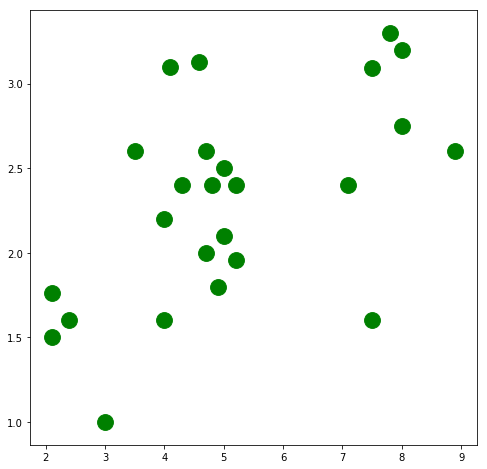

In [131]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.show()

In [132]:
import torch 

#### Converting data to pytorch tensors

In [133]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [134]:
input_size = 1 
hidden_size = 1
output_size = 1 
learning_rate = 0.001

#### Create random Tensors for weights and biases.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [135]:
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [136]:
b1 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
b1.shape

torch.Size([1, 1])

In [137]:
w1

tensor([[0.7303]], requires_grad=True)

In [138]:
b1

tensor([[0.2447]], requires_grad=True)

## Training

#### Foward Pass:
* Predicting Y with input data X
* we use y = ax+b  for predictions as it is a linear regression problem

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and b1.grad will be Tensors holding the gradient of the loss with respect to w1 and b1 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [139]:
for iter in range(1, 4001):
    
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)
    
    loss = (y_pred - Y_train).pow(2).sum() 
    
    if iter % 100 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 7.51888370513916
200 6.548548221588135
300 6.251237869262695
400 6.160140037536621
500 6.132226943969727
600 6.12367582321167
700 6.1210551261901855
800 6.1202521324157715
900 6.1200056076049805
1000 6.119929313659668
1100 6.119907855987549
1200 6.119900226593018
1300 6.119897842407227
1400 6.11989688873291
1500 6.119896411895752
1600 6.119896411895752
1700 6.11989688873291
1800 6.119897365570068
1900 6.119897365570068
2000 6.1198954582214355
2100 6.1198954582214355
2200 6.1198954582214355
2300 6.1198954582214355
2400 6.1198954582214355
2500 6.1198954582214355
2600 6.1198954582214355
2700 6.1198954582214355
2800 6.1198954582214355
2900 6.1198954582214355
3000 6.1198954582214355
3100 6.1198954582214355
3200 6.1198954582214355
3300 6.1198954582214355
3400 6.1198954582214355
3500 6.1198954582214355
3600 6.1198954582214355
3700 6.1198954582214355
3800 6.1198954582214355
3900 6.1198954582214355
4000 6.1198954582214355


In [140]:
print ('w1: ', w1)
print ('b1: ', b1)

w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


#### Checking the output

Converting data into a tensor

In [141]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

#### Get the predicted values using the weights 
Using final weights and biases calculated from our training in order to get the predicted values

In [142]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

tensor([[2.2273],
        [1.8247],
        [2.7175],
        [2.6475],
        [2.1573],
        [2.7701],
        [2.9626],
        [2.3149],
        [2.2081],
        [1.7721],
        [2.8051],
        [2.2799],
        [2.7175],
        [2.2799],
        [2.1048],
        [2.8051],
        [2.3149],
        [2.2624],
        [1.9297],
        [2.2273],
        [2.1048],
        [2.2448],
        [2.0172],
        [1.7721],
        [2.1223]], grad_fn=<AddBackward0>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [143]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.227337 ],
       [1.8246689],
       [2.7175417],
       [2.6475124],
       [2.1573079],
       [2.7700639],
       [2.962644 ],
       [2.3148737],
       [2.208079 ],
       [1.7721469],
       [2.8050785],
       [2.279859 ],
       [2.7175417],
       [2.279859 ],
       [2.104786 ],
       [2.8050785],
       [2.3148737],
       [2.2623518],
       [1.9297128],
       [2.227337 ],
       [2.104786 ],
       [2.2448444],
       [2.0172493],
       [1.7721469],
       [2.1222932]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

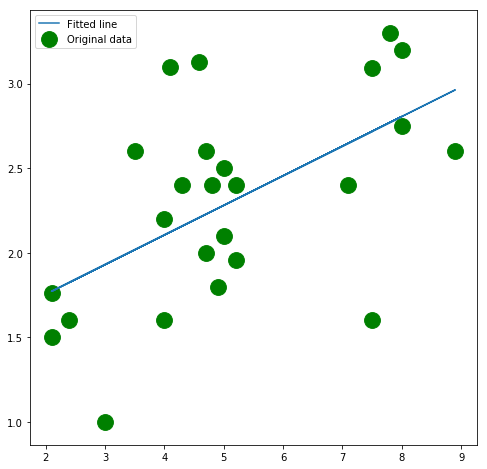

In [144]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend() 

plt.show()

#### We check the weights and biases with sklearn linear regression to see if they match the weights and biases calculated by neural network

In [145]:
import sklearn
from sklearn.linear_model import LinearRegression

In [146]:
reg = LinearRegression().fit(x_train, y_train)

In [147]:
print("w1 with sklearn is :", reg.coef_)

w1 with sklearn is : [[0.17507163]]


In [148]:
print("b1 with sklearn is :", reg.intercept_) 

b1 with sklearn is : [1.4045022]


In [149]:
predicted = reg.predict(x_train)

predicted

array([[2.2273388],
       [1.8246741],
       [2.7175393],
       [2.6475105],
       [2.1573102],
       [2.770061 ],
       [2.9626396],
       [2.3148746],
       [2.208081 ],
       [1.7721525],
       [2.8050752],
       [2.2798603],
       [2.7175393],
       [2.2798603],
       [2.1047888],
       [2.8050752],
       [2.3148746],
       [2.2623532],
       [1.9297171],
       [2.2273388],
       [2.1047888],
       [2.2448459],
       [2.017253 ],
       [1.7721525],
       [2.1222959]], dtype=float32)

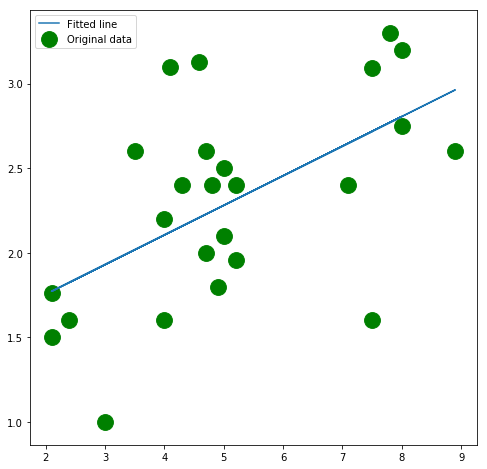

In [150]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend() 

plt.show()